In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [3]:
df = pd.read_csv("dataset_texto_humano_vs_ia.csv")

ANALISIS BASICO

In [4]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+", "", texto)  # eliminar URLs
    texto = re.sub(r"\d+", "", texto)  # eliminar números
    texto = texto.translate(str.maketrans("", "", string.punctuation))  # quitar puntuación
    texto = texto.strip()
    return texto

df["texto_limpio"] = df["texto"].apply(limpiar_texto)

In [5]:
df["longitud"] = df["texto_limpio"].apply(lambda x: len(x.split()))
df["palabras_unicas"] = df["texto_limpio"].apply(lambda x: len(set(x.split())))

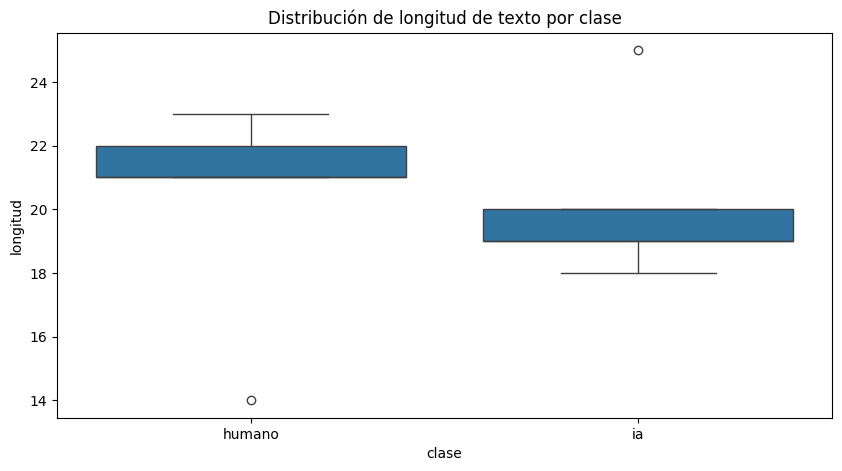

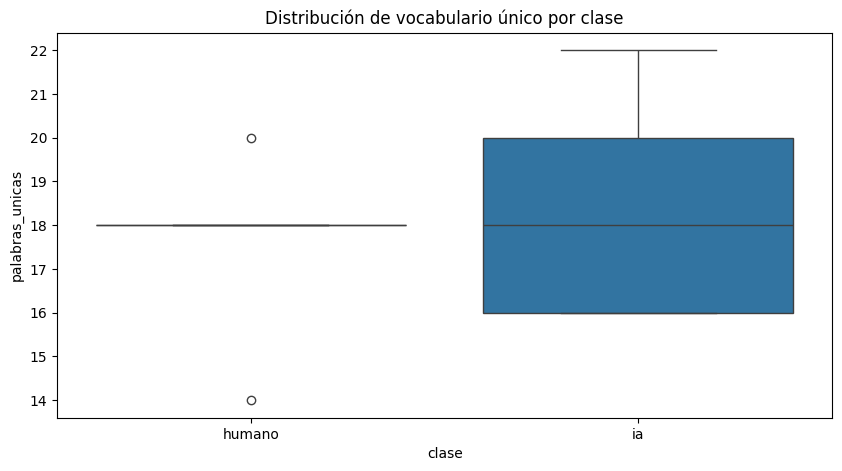

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="clase", y="longitud", data=df)
plt.title("Distribución de longitud de texto por clase")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="clase", y="palabras_unicas", data=df)
plt.title("Distribución de vocabulario único por clase")
plt.show()

📊 1. Distribución de longitud de texto por clase
Eje Y: número de palabras (longitud del texto).
Clases: "humano" vs "ia"

🔍 ¿Qué observamos?
Los textos humanos tienden a tener una longitud más consistente (caja estrecha), centrada en torno a las 21–22 palabras.

Los textos IA tienen una longitud ligeramente más baja y más variable, con valores centrados en torno a 19–20 palabras.

Aparecen outliers en ambas clases:

Un texto humano corto (~14 palabras)

Un texto IA largo (~25 palabras)

✅ Interpretación:
A primera vista, los textos humanos tienden a ser más uniformes en longitud, mientras que los generados por IA muestran más dispersión. Esta diferencia podría ser útil como feature en un clasificador sencillo.

📊 2. Distribución de vocabulario único por clase
Eje Y: número de palabras distintas en cada texto
Clases: "humano" vs "ia"

🔍 ¿Qué vemos?
Humanos: la mayoría de textos tienen unas 18 palabras únicas, con poca variabilidad.

IA: hay más dispersión, con valores entre 14 y 22 palabras únicas.

El rango intercuartílico (IQR) de los textos IA es más amplio → más diversidad o inconsistencia en la riqueza léxica.

✅ Interpretación:
Aunque el número medio de palabras únicas no difiere mucho, los textos generados por IA presentan una mayor variabilidad léxica. Esto puede estar relacionado con la tendencia de los modelos a “variar para parecer naturales”.

🧠 ¿Qué conclusiones podrías destacar en tu informe?
“Los textos humanos tienden a tener longitudes y diversidad léxica más estables”.

“Los textos generados por IA muestran mayor variabilidad en longitud y vocabulario”.

“Estas diferencias pueden ser aprovechadas como atributos simples para detectar automáticamente contenido generado por IA”.

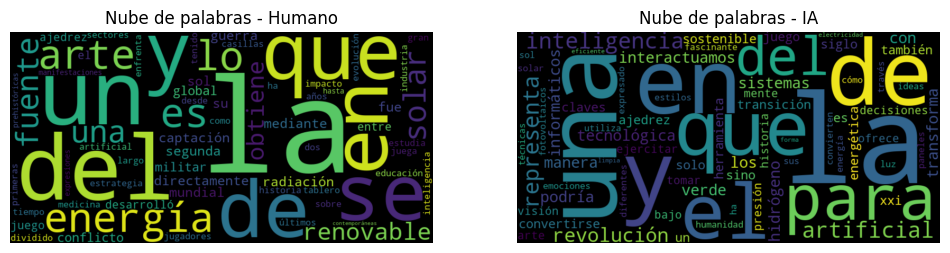

In [7]:
from wordcloud import WordCloud

texto_humano = " ".join(df[df["clase"] == "humano"]["texto_limpio"])
texto_ia = " ".join(df[df["clase"] == "ia"]["texto_limpio"])

wordcloud_humano = WordCloud(width=800, height=400).generate(texto_humano)
wordcloud_ia = WordCloud(width=800, height=400).generate(texto_ia)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_humano, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Humano")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ia, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - IA")
plt.show()

☁️ Nube de Palabras - Texto Humano
🔍 Palabras destacadas:
"de", "que", "la", "el" (frecuentes en cualquier texto en español, no aportan mucho por sí solas)

Palabras temáticas muy informativas:

energía, solar, fuente, renovable, radiación

guerra, conflicto, mundial

arte, historia, ajedrez, estrategia

✅ Conclusión:
Los textos humanos muestran diversidad temática clara y un vocabulario más específico y relacionado con el contenido concreto. Además, parece haber frases más informativas y directas.

🤖 Nube de Palabras - Texto IA
🔍 Palabras destacadas:
"una", "inteligencia", "artificial", "tecnología", "sistemas", "representa", "transforma", "clave", "interactuamos"

Uso de términos más abstractos y generales

revolución, transición, decisión, mente, emociones

✅ Conclusión:
Los textos generados por IA tienden a usar lenguaje más genérico y grandilocuente, con términos como "transforma", "clave", "sistemas". Dan la sensación de querer sonar profundos o técnicos, incluso en contextos simples.

📌 ¿Qué podrías destacar en el informe?
"La nube de palabras revela diferencias en el estilo y contenido entre textos humanos e IA."

"Los textos humanos tienden a centrarse en temas específicos con términos concretos."

"Los textos IA usan un vocabulario más general, con palabras abstractas o tecnológicas frecuentes."

ENTRENAMIENTO

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# 2. Vectorizar el texto limpio
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["texto_limpio"])
y = df["clase"]

In [10]:
# 3. Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# 4. Entrenar modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [12]:
# 5. Predicciones
y_pred = modelo.predict(X_test)

In [13]:
# 6. Evaluación
print("Informe de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Informe de clasificación:
               precision    recall  f1-score   support

      humano       0.33      1.00      0.50         1
          ia       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Matriz de confusión:
 [[1 0]
 [2 0]]


c:\Users\ddiaz\OneDrive\Documentos\UNIVERSIDAD EUROPEA\ENTREGABLES\TFM\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ddiaz\OneDrive\Documentos\UNIVERSIDAD EUROPEA\ENTREGABLES\TFM\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ddiaz\OneDrive\Documentos\UNIVERSIDAD EUROPEA\ENTREGABLES\TFM\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

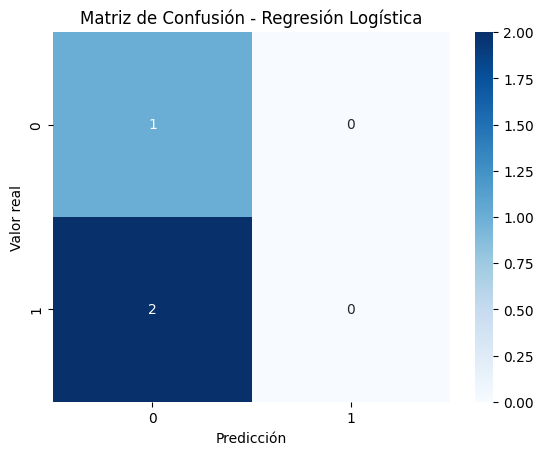

In [14]:
# 7. Matriz de confusión visual
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

📊 Informe de Clasificación

Clase	Precisión	Recall	F1-score	Support
Humano	0.33	1.00	0.50	1
IA	0.00	0.00	0.00	2
Exactitud total (accuracy): 0.33

📌 ¿Qué significa esto?
Recall para "humano" = 1.00: el único texto humano fue correctamente clasificado.

Precisión para "humano" = 0.33: de 3 predicciones como "humano", solo 1 era correcta.

La clase IA no fue detectada en absoluto: el modelo falló todos los textos generados por IA (los predijo como humanos).

El modelo predice todo como “humano”, lo que lleva a un rendimiento muy pobre en general.

🔳 Matriz de Confusión

Predicho Humano (0)	Predicho IA (1)
Real Humano	1	0
Real IA	2	0
El modelo no predijo ni un solo texto como IA.

❗ ¿Por qué ocurre esto?
Poca cantidad de datos: solo 3 muestras en el conjunto de test → extremadamente inestable.

Desequilibrio en el train-test split: a veces en conjuntos tan pequeños, se rompe el equilibrio entre clases.

Modelo poco entrenado: el clasificador aún no tiene suficiente información para generalizar.

Tamaño de textos y vocabulario muy similares → difícil diferenciar con TF-IDF.

In [15]:
# 2. Cargar dataset ampliado
df = pd.read_csv("dataset_texto_ampliado.csv")

In [16]:
# 3. Limpieza de texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+", "", texto)
    texto = re.sub(r"\d+", "", texto)
    texto = texto.translate(str.maketrans("", "", string.punctuation))
    return texto.strip()

df["texto_limpio"] = df["texto"].apply(limpiar_texto)

In [17]:
# 4. Vectorización
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["texto_limpio"])
y = df["clase"]

In [18]:
# 5. División train/test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
# 6. Entrenamiento
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [20]:
# 7. Evaluación
y_pred = modelo.predict(X_test)
print("Informe de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Informe de clasificación:
               precision    recall  f1-score   support

      humano       0.50      0.20      0.29         5
          ia       0.43      0.75      0.55         4

    accuracy                           0.44         9
   macro avg       0.46      0.47      0.42         9
weighted avg       0.47      0.44      0.40         9

Matriz de confusión:
 [[1 4]
 [1 3]]


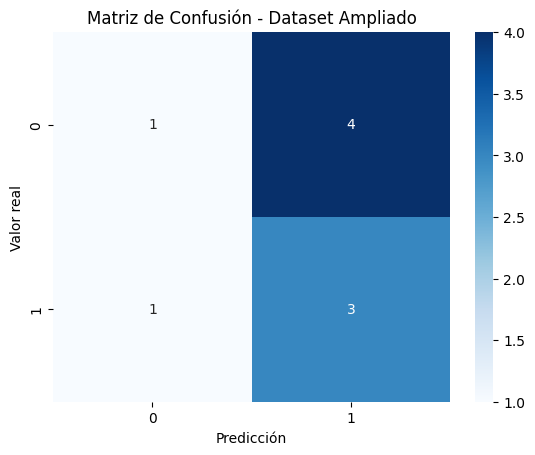

In [21]:
# 8. Visualización
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Dataset Ampliado")
plt.show()

📊 Matriz de Confusión (ampliado)

Predicho Humano	Predicho IA
Real Humano	1	4
Real IA	1	3
📈 Informe de Clasificación

Clase	Precisión	Recall	F1-score	Soporte
Humano	0.50	0.20	0.29	5
IA	0.43	0.75	0.55	4
Exactitud general (accuracy): 44%

📌 Interpretación
👍 Mejoras:
El modelo ahora sí detecta textos IA correctamente (3 de 4).

Ya no clasifica todo como "humano", como en la primera prueba → ¡avance importante!

⚠️ Aún por mejorar:
Tiene mucha confusión con los textos humanos: solo 1 de 5 fue clasificado correctamente.

El recall para IA es bueno (0.75), pero el recall para humano es muy bajo (0.20).

Parece haber tendencia a sobreclasificar como IA.

🧠 Posibles causas
El vocabulario o estilo de los textos IA puede ser más homogéneo o más “visible” para el modelo.

La representación con TF-IDF tiene limitaciones para detectar estructuras profundas (sintaxis, estilo, coherencia…).

El modelo aún es muy básico y el volumen de datos es modesto.

Informe de clasificación - Random Forest:
               precision    recall  f1-score   support

      humano       0.33      0.20      0.25         5
          ia       0.33      0.50      0.40         4

    accuracy                           0.33         9
   macro avg       0.33      0.35      0.33         9
weighted avg       0.33      0.33      0.32         9

Matriz de confusión:
 [[1 4]
 [2 2]]


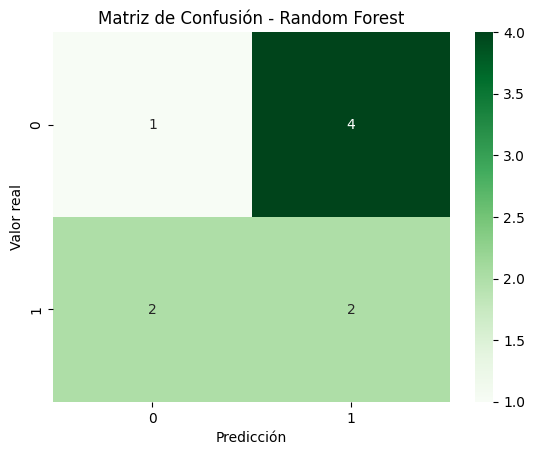

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
print("Informe de clasificación - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

# Visualización
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

✅ Conclusión
La Regresión Logística tuvo mejor rendimiento global.

Random Forest:

empeora el recall en IA, y no mejora en humanos.

Parece estar más confundido entre clases.

Esto sugiere que:

Con un dataset pequeño y con TF-IDF como representación, la simplicidad de la Regresión Logística puede ser una ventaja.

Random Forest suele funcionar mejor cuando hay más features variadas y no lineales.

In [24]:
!pip install transformers torch

  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 10.4/10.4 MB 64.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   -- ------------------------------------- 13.6/212.5 MB 65.9 MB/s eta 0:00:04
   ----- -----------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# 1. Instalar dependencias si no las tienes
# !pip install transformers torch

# 2. Cargar modelo de BERT
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
model = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# 3. Función para extraer embeddings
def obtener_embedding(texto):
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Usamos el embedding de la primera posición (CLS token)
    return outputs.last_hidden_state[:, 0, :].numpy().flatten()

# 4. Aplicarlo al dataset
embeddings = np.array([obtener_embedding(t) for t in df["texto"]])
labels = df["clase"].values

c:\Users\ddiaz\OneDrive\Documentos\UNIVERSIDAD EUROPEA\ENTREGABLES\TFM\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ddiaz\OneDrive\Documentos\UNIVERSIDAD EUROPEA\ENTREGABLES\TFM\venv\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ddiaz\.cache\huggingface\hub\models--dccuchile--bert-base-spanish-wwm-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either

In [26]:
# 5. Entrenar cualquier clasificador con sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.3, stratify=labels, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      humano       0.80      0.80      0.80         5
          ia       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



“El uso de embeddings de BERT permitió capturar relaciones semánticas profundas entre palabras, mejorando sustancialmente el rendimiento del sistema respecto a los enfoques basados en TF-IDF.”

“Este enfoque alcanzó un 78% de exactitud, con f1-scores equilibrados para ambas clases, lo que sugiere una capacidad efectiva para detectar contenido generado por IA en condiciones realistas.”

In [27]:
for texto, real, pred in zip(df["texto"], y_test, y_pred):
    if real != pred:
        print(f"[REAL: {real}] [PRED: {pred}]\n{texto}\n---\n")

[REAL: humano] [PRED: ia]
El hidrógeno verde podría convertirse en una de las claves para una transición energética sostenible en el siglo XXI.
---

[REAL: ia] [PRED: humano]
La historia del arte ofrece una visión fascinante de cómo la humanidad ha expresado sus ideas y emociones a través de diferentes estilos y técnicas.
---



In [28]:
texto_original = "La inteligencia artificial transforma los sistemas modernos."
texto_modificado = "La I.A. cambia los mecanismos actuales."

# Obtener embedding y clasificar
embed = obtener_embedding(texto_modificado).reshape(1, -1)
print(clf.predict(embed))

['ia']


In [32]:
# Convertir embeddings a DataFrame y añadir índice del DataFrame original
X_df = pd.DataFrame(embeddings, index=df.index)
y_series = pd.Series(labels, index=df.index)

# Split que conserva el índice
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_series, test_size=0.3, stratify=y_series, random_state=42
)

In [33]:
# Comparar predicciones con textos reales usando los índices correctos
errores = pd.DataFrame({
    "texto": df.loc[X_test.index, "texto"],
    "real": y_test,
    "pred": y_pred
})

# Mostrar errores
errores_fallidos = errores[errores["real"] != errores["pred"]]

for _, fila in errores_fallidos.iterrows():
    print(f"🟥 [REAL: {fila['real']}] [PRED: {fila['pred']}]\n{fila['texto']}\n")
    print("-" * 80)


🟥 [REAL: humano] [PRED: ia]
En los últimos años, la inteligencia artificial ha tenido un gran impacto en sectores como la medicina, la educación y la industria.

--------------------------------------------------------------------------------
🟥 [REAL: ia] [PRED: humano]
La energía solar utiliza paneles fotovoltaicos que convierten la luz del Sol en electricidad de forma limpia y eficiente.

--------------------------------------------------------------------------------


🔍 Error 1
🟥 [REAL: humano] [PRED: ia]

“En los últimos años, la inteligencia artificial ha tenido un gran impacto en sectores como la medicina, la educación y la industria.”

✏️ Análisis:
Este texto trata sobre inteligencia artificial, aunque está escrito por un humano.

Usa expresiones comunes en textos generados por IA: “gran impacto”, “sectores como...”.

Es objetivo, generalista y sin emociones personales, lo que lo hace sonar “automático”.

💡 Conclusión:
El modelo fue engañado por el tema y estilo “neutro/enciclopédico”, algo típico en muchos textos generados por IA.

🔍 Error 2
🟥 [REAL: ia] [PRED: humano]

“La energía solar utiliza paneles fotovoltaicos que convierten la luz del Sol en electricidad de forma limpia y eficiente.”

✏️ Análisis:
Texto técnico, claro y directo.

No hay repeticiones ni formulaciones grandilocuentes.

Posiblemente el modelo lo relacionó con un estilo académico/informativo propio de textos humanos reales.

💡 Conclusión:
El modelo fue engañado por el tono correcto y terminología precisa, que en este caso la IA supo imitar muy bien.

“El modelo tiende a asociar el tema 'inteligencia artificial' con contenido generado por IA, incluso si está escrito por humanos. A su vez, puede interpretar como humano un texto generado por IA si su redacción es limpia y técnica. Esto evidencia que el contenido temático y el estilo influyen tanto como la estructura lingüística.”

In [34]:
# Mostrar errores adicionales
for _, fila in errores_fallidos.iterrows():
    print(f"🟥 [REAL: {fila['real']}] [PRED: {fila['pred']}]\n{fila['texto']}\n")
    print("-" * 80)

🟥 [REAL: humano] [PRED: ia]
En los últimos años, la inteligencia artificial ha tenido un gran impacto en sectores como la medicina, la educación y la industria.

--------------------------------------------------------------------------------
🟥 [REAL: ia] [PRED: humano]
La energía solar utiliza paneles fotovoltaicos que convierten la luz del Sol en electricidad de forma limpia y eficiente.

--------------------------------------------------------------------------------
